### Assignment 2 (4 scores):

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv', sep = ';')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Proprecessing data

In [5]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
def encode_target(value:str) -> int:
    if value == 'Enrolled':
        return 0
    elif value == 'Dropout':
        return 1
    else:
        return 2

In [8]:
data['Target'] = data['Target'].apply(encode_target)

In [9]:
for col in data.columns:
    print(f'{col}\nMin: {data[col].min()} \nMax: {data[col].max()}')

Marital status
Min: 1 
Max: 6
Application mode
Min: 1 
Max: 57
Application order
Min: 0 
Max: 9
Course
Min: 33 
Max: 9991
Daytime/evening attendance	
Min: 0 
Max: 1
Previous qualification
Min: 1 
Max: 43
Previous qualification (grade)
Min: 95.0 
Max: 190.0
Nacionality
Min: 1 
Max: 109
Mother's qualification
Min: 1 
Max: 44
Father's qualification
Min: 1 
Max: 44
Mother's occupation
Min: 0 
Max: 194
Father's occupation
Min: 0 
Max: 195
Admission grade
Min: 95.0 
Max: 190.0
Displaced
Min: 0 
Max: 1
Educational special needs
Min: 0 
Max: 1
Debtor
Min: 0 
Max: 1
Tuition fees up to date
Min: 0 
Max: 1
Gender
Min: 0 
Max: 1
Scholarship holder
Min: 0 
Max: 1
Age at enrollment
Min: 17 
Max: 70
International
Min: 0 
Max: 1
Curricular units 1st sem (credited)
Min: 0 
Max: 20
Curricular units 1st sem (enrolled)
Min: 0 
Max: 26
Curricular units 1st sem (evaluations)
Min: 0 
Max: 45
Curricular units 1st sem (approved)
Min: 0 
Max: 26
Curricular units 1st sem (grade)
Min: 0.0 
Max: 18.875
Curricular 

### Normalization

In [10]:
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [11]:
for col in data.columns:
    if data[col].dtype == np.float64:
        continuous_columns = col
        
data[continuous_columns] = (data[continuous_columns] - data[continuous_columns].mean()) / data[continuous_columns].std()

for col in data.columns:
    if col not in continuous_columns and col != 'Target':
        data[col] = data[col] / data[col].max()

### Seperation train/test 

In [12]:
X = data.iloc[: , :-1]
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.166667,0.298246,0.555556,0.017115,1.0,0.023256,0.642105,0.009174,0.431818,0.272727,...,0.0,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.666667,0.378378,0.765674
1,0.166667,0.263158,0.111111,0.926234,1.0,0.023256,0.842105,0.009174,0.022727,0.068182,...,0.0,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.858025,-0.081081,0.347160
2,0.166667,0.017544,0.555556,0.907817,1.0,0.023256,0.642105,0.009174,0.840909,0.840909,...,0.0,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.666667,0.378378,0.765674
3,0.166667,0.298246,0.222222,0.978180,1.0,0.023256,0.642105,0.009174,0.863636,0.840909,...,0.0,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.580247,-0.216216,-1.375356
4,0.333333,0.684211,0.111111,0.802122,0.0,0.023256,0.526316,0.009174,0.840909,0.863636,...,0.0,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.858025,-0.081081,0.347160


In [13]:
X = X.to_numpy()
X.shape

(4424, 36)

In [14]:
Y = data.iloc[:, -1]
Y = Y.to_numpy()
Y.shape

(4424,)

In [15]:
N = int(0.8 * X.shape[0])
X_train, X_test = np.array_split(X, [N])
y_train, y_test = np.array_split(Y, [N])

In [16]:
print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (3539, 36) (3539,)
Test:  (885, 36) (885,)


In [17]:
encoded_y_train = np.zeros((y_train.shape[0], 3))
encoded_y_train[y_train == 0] = np.array([1,0,0])
encoded_y_train[y_train == 1] = np.array([0,1,0])
encoded_y_train[y_train == 2] = np.array([0,0,1])

### Building Softmax Regression

In [18]:
class SR:
    def __init__(self, epoch: int, lr:float) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def softmax(self, z: np.ndarray) -> np.ndarray:
        z = np.where(z == 0, 10e-5, z)
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def loss_function(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -((y * np.log(y_hat + 10e-5)).sum(axis=-1)).mean()

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) ->float:
        return (y == y_hat).mean()
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0]
        d = X.shape[1]
        n_classes = y.shape[-1]
        self.theta = np.zeros((d, n_classes))
        for e in range(self.epoch):
            y_hat = self.predict(X)
            diff = y_hat - y 
            gradient = 1/n * np.matmul(X.T, diff)
            self.theta -= self.lr * gradient
            loss = self.loss_function(y, y_hat)
            acc = self.accuracy(y, y_hat)
            self.losses.append(loss)
            self.metrics.append(acc)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        z = np.matmul(X, self.theta)
        return self.softmax(z)

In [19]:
softmax_reg = SR(1000, 0.001)
softmax_reg.fit(X_train, encoded_y_train)

<Axes: >

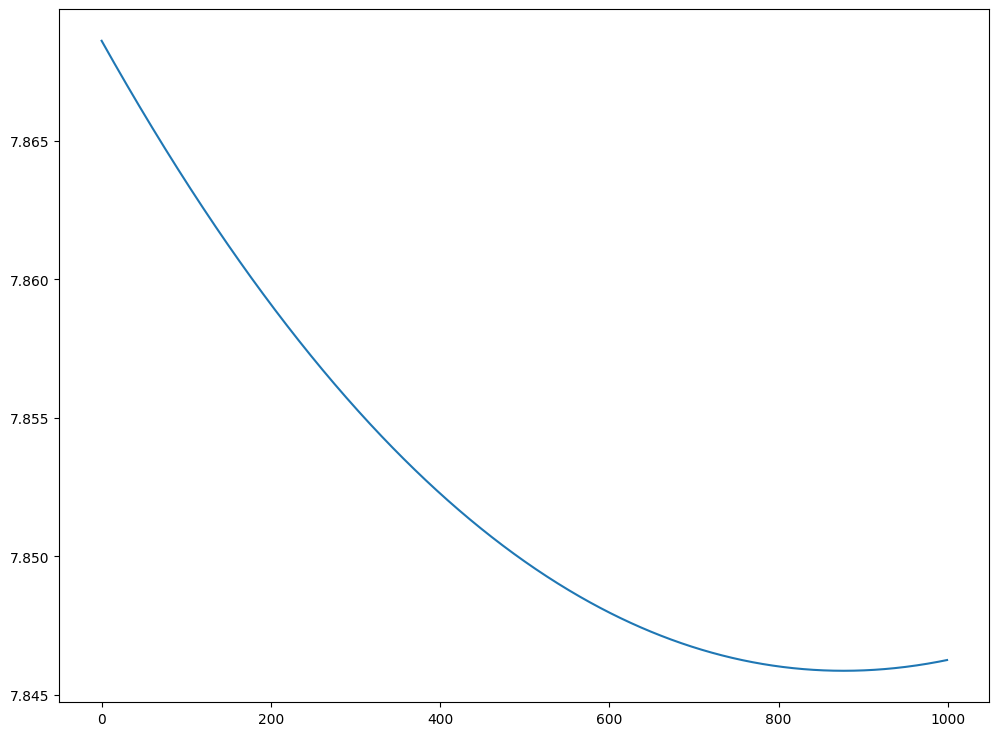

In [20]:
plt.figure(figsize=(12,9))
sns.lineplot(softmax_reg.losses)

In [21]:
y_hat_test = softmax_reg.predict(X_test)
y_hat_test.shape

(885, 3)

In [22]:
y_pred_test = y_hat_test.argmax(axis=-1)
y_pred_test

array([2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 0,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       2, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1,
       0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0,

In [23]:
accuracy = softmax_reg.accuracy(y_test, y_pred_test)
print('accuracy: ', accuracy)

accuracy:  0.5073446327683616
